# boston house price dataset
using multiple linear regression (sklearn)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("boston.csv")

In [3]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
PRICE         0
dtype: int64

In [7]:
# no null values in the dataset 

In [8]:
X = df.iloc[::, 1:14]
y = df.iloc[::,-1]

In [9]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
X.shape

(506, 13)

In [11]:
type(X)

pandas.core.frame.DataFrame

In [12]:
y.shape

(506,)

In [13]:
type(y)

pandas.core.series.Series

In [14]:
# X --> feature, dataframe
# y --> target, pandas series

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn. preprocessing import StandardScaler

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [18]:
from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()

In [19]:
lrmodel.fit(X_train, y_train)

LinearRegression()

In [20]:
y_tran_prd = lrmodel.predict(X_train)

In [21]:
y_test_prd = lrmodel.predict(X_test)

In [23]:
# calculating mean values on training set

# absolute mean value
train_score1 = mean_absolute_error(y_train, y_tran_prd)
train_score2 = mean_squared_error(y_train, y_tran_prd)
train_score3 = r2_score(y_train, y_tran_prd)

print(train_score1)
print(train_score2)
print(train_score3)


3.3844575399167924
22.95369357611288
0.7285831776605591


In [24]:
# calculating mean values on test set

# absolute mean value
test_score1 = mean_absolute_error(y_test, y_test_prd)
test_score2 = mean_squared_error(y_test, y_test_prd)
test_score3 = r2_score(y_test, y_test_prd)

print(test_score1)
print(test_score2)
print(test_score3)

3.11304374689344
18.49542012244847
0.7789207451814409


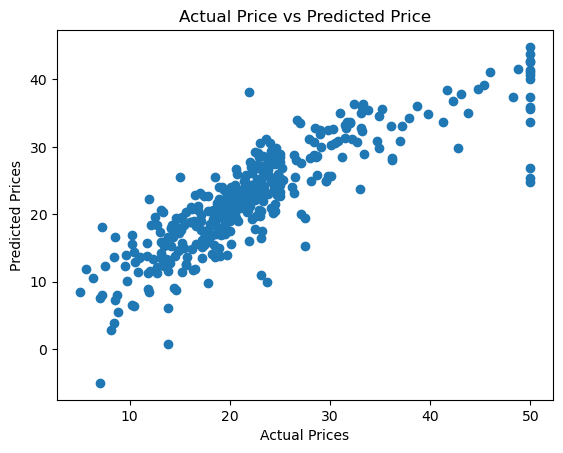

In [29]:
# using scatter plot on training dataset
plt.scatter(y_train, y_tran_prd)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

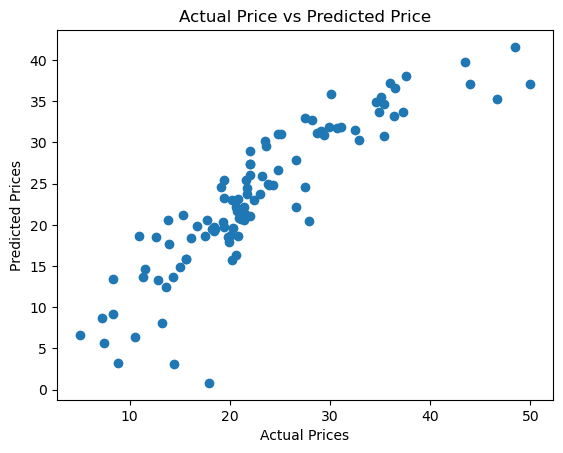

In [28]:
# using scatter plot on testing dataset
plt.scatter(y_test, y_test_prd)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [30]:
m = lrmodel.coef_
b = lrmodel.intercept_

print(m)
print(b)

[-1.08223557e-01  3.89039349e-02 -1.51517627e-02  3.15897941e+00
 -1.65854070e+01  3.63288486e+00  9.35052187e-03 -1.38618151e+00
  3.24065945e-01 -1.16245167e-02 -1.03644251e+00  1.16127489e-02
 -5.58409340e-01]
37.19980774264971


In [31]:
m.shape

(13,)

In [32]:
# jitne columns hai utni m ki values bhi hongi

In [33]:
# compare the predicted y values vs the actual y values for the testing set

In [34]:
np.array(y_test)

array([20.2, 15.3, 37.3, 32.5,  8.8, 14.4, 22. , 26.6, 15. , 21.5, 29.4,
       24.8, 22. , 16.1, 13.9, 21.6, 21.7, 12.8,  7.2, 12.6, 20.7, 19.3,
       36.5, 17.7, 16.7, 20.2, 50. , 34.6, 35.4, 19.4, 20.8, 21.1, 31.1,
       23.5,  8.3, 15.6, 11.3, 21.7, 23.2, 20.8, 22. , 13.6, 28.7, 10.5,
       23. , 13.8, 36.4, 18.4, 30.1, 17.9, 29.9, 30.7,  5. , 35.4, 27.9,
       18.4, 18.5, 17.5, 15.6, 22.4, 20.3, 20.6, 19.8, 28.2, 35.1, 27.5,
       48.5, 27.5, 11.5, 22. , 13.2,  7.4, 20.6, 20.1, 25.1, 22. , 19.1,
       24.3, 19.4, 23.9, 34.9, 19.4, 21.4, 26.6, 37.6, 36. , 21.4, 23.6,
       24.8, 19.9, 20.9, 18.2, 10.9, 44. , 43.5,  8.3, 46.7, 32.9, 21.7,
       14.3, 29.1, 23.8])

In [35]:
y_test_prd

array([23.01506153, 21.2115869 , 33.71590384, 31.56542369,  3.1826268 ,
        3.15381954, 27.40305304, 22.2126176 , 14.86506114, 21.34105453,
       30.95942941, 26.70065029, 21.12624382, 18.37282564, 17.64315354,
       25.38194186, 24.42970445, 13.36957057,  8.66686786, 18.57490534,
       21.73966467, 20.34270529, 36.5461105 , 20.59627495, 19.87979627,
       15.75766967, 37.11632999, 34.85897895, 30.83458635, 23.23441285,
       18.68278505, 20.749546  , 31.84560076, 30.20214207, 13.3861702 ,
       15.87078398, 13.70766096, 23.74163998, 25.95135088, 23.18325878,
       28.99906539, 12.50341936, 31.08347911,  6.39401895, 23.71801218,
       20.61523929, 33.15362417, 19.21862493, 35.89603081,  0.82365329,
       31.90288611, 31.69640543,  6.58849712, 34.62762996, 20.41162545,
       19.69277608, 19.53445865, 18.58689088, 15.81420496, 22.98764309,
       19.65947045, 16.36377019, 18.48783369, 32.76568172, 35.49022568,
       24.58349631, 41.5854766 , 32.94818456, 14.60990256, 27.43